I like the t-SNE classifier, so let's implement that!

This notebook needs to be further fleshed out...

In [1]:
%matplotlib notebook
import numpy as np
np.random.seed(123)
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects

import os

from keras.datasets import mnist

import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import paired_distances

Using TensorFlow backend.


scikit-learn version: 0.20.0


# Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape")
print(X_train.shape)
print("Testing data shape")
print(X_test.shape)

# scale data
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
# X_train = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
print(X_train.shape)

In [36]:
from sklearn import datasets
digits = datasets.load_digits(n_class=6)
# digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

X_train = X

# TSNE
# model = TSNE(random_state=42, verbose=2, n_components=2,
#              learning_rate=500, perplexity=20, n_iter=5000)
model = TSNE(random_state=42, verbose=2, n_components=2, early_exaggeration=50,
             learning_rate=500, perplexity=20, n_iter=1000,
             init='pca')
reduced_data = model.fit_transform(X_train)
# reduced_data = model.fit_transform(X_train[:1000])
print(reduced_data.shape)

Training data shape
(60000, 28, 28)
Testing data shape
(10000, 28, 28)
(60000, 784)
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1083 samples in 0.002s...
[t-SNE] Computed neighbors for 1083 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1083
[t-SNE] Computed conditional probabilities for sample 1083 / 1083
[t-SNE] Mean sigma: 7.664150
[t-SNE] Computed conditional probabilities in 0.058s
[t-SNE] Iteration 50: error = 377.6150513, gradient norm = 0.6692709 (50 iterations in 0.325s)
[t-SNE] Iteration 100: error = 380.6838074, gradient norm = 0.6943086 (50 iterations in 0.410s)
[t-SNE] Iteration 150: error = 390.3156128, gradient norm = 0.6567239 (50 iterations in 0.527s)
[t-SNE] Iteration 200: error = 385.9696655, gradient norm = 0.6684035 (50 iterations in 0.477s)
[t-SNE] Iteration 250: error = 388.2398682, gradient norm = 0.6619949 (50 iterations in 0.329s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 388.239868
[t-

<IPython.core.display.Javascript object>


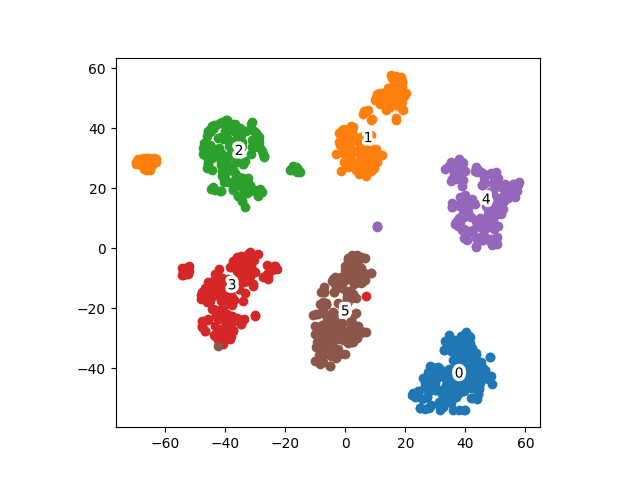

(178, 2)
(182, 2)
(177, 2)
(183, 2)
(181, 2)
(182, 2)


In [37]:
# plot
fig = plt.figure()
ax = plt.subplot(111, aspect="equal")
# ax.scatter(reduced_data[:,0], reduced_data[:,1])
for i in range(6):
# for i in range(10):
    l_r = reduced_data[y == i]
    ax.scatter(l_r[:,0], l_r[:,1], label=str(i))
    x_text, y_text = np.median(l_r, axis=0)
    txt = ax.text(x_text, y_text, str(i))
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape")
print(X_train.shape)
print("Testing data shape")
print(X_test.shape)

# scale data
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
# X_train = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
print(X_train.shape)

from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

X_train = X

# TSNE
# model = TSNE(random_state=42, verbose=2, n_components=2,
#              learning_rate=500, perplexity=20, n_iter=5000)
model = TSNE(random_state=42, verbose=2, n_components=2, early_exaggeration=50,
             learning_rate=500, perplexity=20, n_iter=1000,
             init='pca')
reduced_data = model.fit_transform(X_train)
# reduced_data = model.fit_transform(X_train[:1000])
print(reduced_data.shape)

Training data shape
(60000, 28, 28)
Testing data shape
(10000, 28, 28)
(60000, 784)
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 7.683244
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 392.6139832, gradient norm = 0.6698523 (50 iterations in 0.763s)
[t-SNE] Iteration 100: error = 411.1610413, gradient norm = 0.6600260 (50 iterations in 0.846s)
[t-SNE] Iteration 150: error = 418.5543213, gradient norm = 0.6666587 (50 iterations in 0.754s)
[t-SNE] Iteration 200: error = 419.8966675, gradient norm = 0.6583439 (50 iterations in 0.676s)
[t-SNE] Iteration 250: error = 418.9822388, gradient norm = 0.6872576 (50 iterations in 0.775s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 418.982239
[t-

<IPython.core.display.Javascript object>


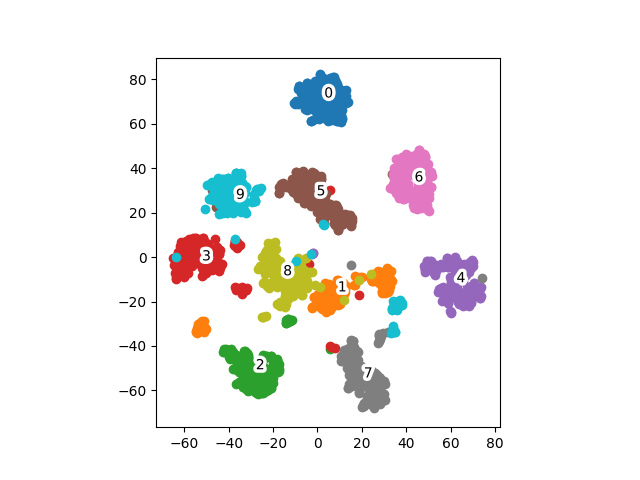

In [40]:
# plot
fig = plt.figure()
ax = plt.subplot(111, aspect="equal")
# ax.scatter(reduced_data[:,0], reduced_data[:,1])
for i in range(10):
    l_r = reduced_data[y == i]
    ax.scatter(l_r[:,0], l_r[:,1], label=str(i))
    x_text, y_text = np.median(l_r, axis=0)
    txt = ax.text(x_text, y_text, str(i))
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape")
print(X_train.shape)
print("Testing data shape")
print(X_test.shape)

# scale data
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
# X_train = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
print(X_train.shape)

# TSNE
# model = TSNE(random_state=42, verbose=2, n_components=2,
#              learning_rate=500, perplexity=20, n_iter=5000)
model = TSNE(random_state=2050, verbose=2, n_components=2, early_exaggeration=10,
             learning_rate=200, perplexity=20, n_iter=2000)
# reduced_data = model.fit_transform(X_train)
reduced_data = model.fit_transform(X_train[:1000])
print(reduced_data.shape)

Training data shape
(60000, 28, 28)
Testing data shape
(10000, 28, 28)
(60000, 784)
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 1.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 500.170190
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 60.1551704, gradient norm = 0.1855037 (50 iterations in 0.393s)
[t-SNE] Iteration 100: error = 57.5892105, gradient norm = 0.1740206 (50 iterations in 0.339s)
[t-SNE] Iteration 150: error = 57.4923897, gradient norm = 0.1601127 (50 iterations in 0.382s)
[t-SNE] Iteration 200: error = 57.6248360, gradient norm = 0.1660876 (50 iterations in 0.317s)
[t-SNE] Iteration 250: error = 57.5973282, gradient norm = 0.1779291 (50 iterations in 0.458s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.597328
[t-SNE] Iteration 300: error = 1.0920863, gradient norm = 0.0012963 (50 i

<IPython.core.display.Javascript object>


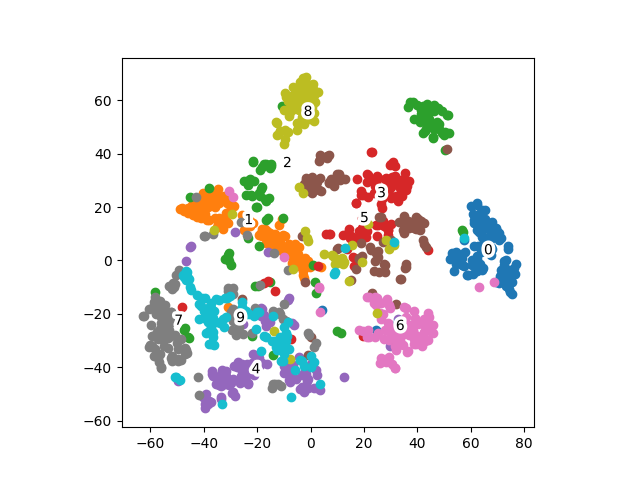

In [73]:
# plot
fig = plt.figure()
ax = plt.subplot(111, aspect="equal")
# ax.scatter(reduced_data[:,0], reduced_data[:,1])
for i in range(10):
    l_r = reduced_data[y_train[:1000] == i]
    ax.scatter(l_r[:,0], l_r[:,1], label=str(i))
    x_text, y_text = np.median(l_r, axis=0)
    txt = ax.text(x_text, y_text, str(i))
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])